#Explicaciones básicas de cada método:


**Metodo de aceptacion y rechazo:**

Es una técnica utilizada para generar variables aleatorias con una distribución objetivo f(x), partiendo de otra distribución conocida más simple g(x), llamada distribución propuesta. Entonces:
- Se toma un valor de x desde g(x).
- Decides si aceptarlo o rechazarlo con cierta probabilidad basada en la forma de f(x).

La forma de aceptar o no un valor se basa en una constante c tal que la misma cumpla que $\frac{f(x)}{g(x)}≤c$

**Método de la transformada inversa**

Es una técnica para generar números aleatorios a partir de una distribución de probabilidad dada. Se basa en que la función de distribución acumulada de una va es una función monótona creciente entre 0 y 1. Entonces si podemos invertirla podemos generar un número aleatorio uniforme entre 0 y 1 y luego usar la inversa para obtener un número aleatorio de la distribución deseada.

**Método de la urna**

Es una técnica intuitiva para generar variables aleatorias discretas con probabilidades específicas. Se basa en una analogía física de una urna llena de bolas de diferentes colores donde la frecuencia de cada tipo refleja su probabilidad. Entonces si se quiere generar una v.a X que toma ciertos valores $x_1,x_2,...,x_n$ con probabilidades $p_1,p_2,...,p_n$, se puede pensar así:
- Llenas una urna con muchas bolas.
- Cada valor $x_i$ se representa con una cantidad de bolas proporcional a su probabilidad $p_i$.
- Extraes una bola al azar de la urna.
- El valor que tenga la bola es tu valor generado.

#Ejercicio 3

Estuctura logica:
1. Inicializar un conjunto vacío de sumas observadas.
2. Inicializar un contador de lanzamientos N = 0.
3. Mientras no se hayan obtenido todas las sumas posibles (2 a 12):
4. Lanzar dos dados y sumar sus valores.
5. Agregar la suma al conjunto de sumas observadas.
6. Incrementar N en 1.
7. Cuando el conjunto tenga los 11 valores, detenerse y registrar N
8. Repetir el experimento muchas veces para obtener estadísticas.

In [ ]:
import random
import math
import statistics

def simular_un_experimento():
    resultados_obtenidos = set()
    N = 0
    while len(resultados_obtenidos) < 11:
        dado1 = random.randint(1, 6)
        dado2 = random.randint(1, 6)
        suma = dado1 + dado2
        resultados_obtenidos.add(suma)
        N += 1
    return N

def simular_varias_veces(num_repeticiones):
    valores_N = []
    for _ in range(num_repeticiones):
        N = simular_un_experimento()
        valores_N.append(N)

    media = statistics.mean(valores_N)
    desv_std = statistics.stdev(valores_N)
    prob_N_mayor_igual_15 = sum(1 for res in valores_N if 15 <= res) / num_repeticiones
    prob_N_menor_igual_9 = sum(1 for res in valores_N if res <= 9) / num_repeticiones

    return media, desv_std, prob_N_mayor_igual_15, prob_N_menor_igual_9

repeticiones = [100, 1000, 10000, 100000]
for rep in repeticiones:
    media, desv_std, p_geq_15, p_leq_9 = simular_varias_veces(rep)
    print(f"\nPara {rep} repeticiones:")
    print(f"  Media de N: {media:.4f}")
    print(f"  Desviación estándar de N: {desv_std:.4f}")
    print(f"  P(N ≥ 15): {p_geq_15:.4f}")
    print(f"  P(N ≤ 9): {p_leq_9:.4f}")


Para 100 repeticiones:
  Media de N: 64.8200
  Desviación estándar de N: 43.9463
  P(N ≥ 15): 0.9900
  P(N ≤ 9): 0.0000

Para 1000 repeticiones:
  Media de N: 60.2840
  Desviación estándar de N: 34.0146
  P(N ≥ 15): 0.9970
  P(N ≤ 9): 0.0000

Para 10000 repeticiones:
  Media de N: 61.3456
  Desviación estándar de N: 35.9909
  P(N ≥ 15): 0.9987
  P(N ≤ 9): 0.0000

Para 100000 repeticiones:
  Media de N: 61.1911
  Desviación estándar de N: 36.0915
  P(N ≥ 15): 0.9988
  P(N ≤ 9): 0.0000


# Ejercicio 4

Metodo rechazo tiempo: 0.011799 segundos
Metodo rechazo c = 3 tiempo: 0.018687 segundos
Metodo de la transformada inversa tiempo: 0.003806 segundos
Metodo de la urna tiempo: 0.005817 segundos


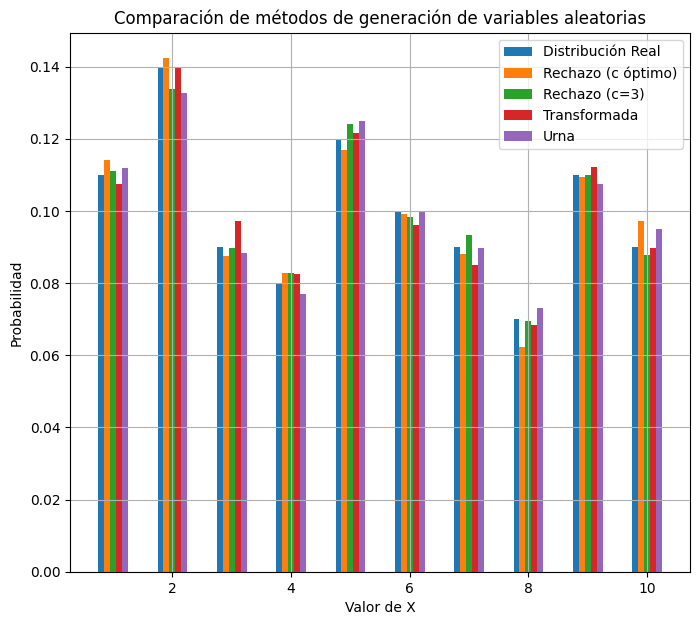

In [ ]:
import random
import time
import matplotlib.pyplot as plt
from collections import Counter

x = [i for i in range(1,11)]
p = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]

def metodo_rechazo(c):
    while True:
        y = random.randint(1, 10)  # Uniforme discreta en {1,...,10}
        U = random.random()
        if U < p[y - 1] / (c * 0.1):
            return y

def transformada_inversa(p, x):
    U = random.random()
    i, F = 0, p[0]
    while U >= F:
        i +=1
        F += p[i]
    return x[i]

def construir_urna(p):
    urna_nueva = []
    for i in range(len(p)):
        for _ in range(int(p[i] * 100)):
            urna_nueva.append(i + 1)
    return urna_nueva

def urnaX(A,k):
    I = random.randint(0, k-1)
    return A[I]

# Simulaciones
n = 10000
c = max(p[i]/0.1 for i in range(10))

# Guardar resultados
start = time.perf_counter()
result_rechazo = [metodo_rechazo(c) for _ in range(n)]
end = time.perf_counter()
print(f"Metodo rechazo tiempo: {end-start:.6f} segundos")

start = time.perf_counter()
result_rechazo3 = [metodo_rechazo(3) for _ in range(n)]
end = time.perf_counter()
print(f"Metodo rechazo c = 3 tiempo: {end-start:.6f} segundos")

start = time.perf_counter()
result_transf = [transformada_inversa(p, x) for _ in range(n)]
end = time.perf_counter()
print(f"Metodo de la transformada inversa tiempo: {end-start:.6f} segundos")

urna = construir_urna(p)
start = time.perf_counter()
result_urna = [urnaX(urna, len(urna)) for _ in range(n)]
end = time.perf_counter()
print(f"Metodo de la urna tiempo: {end-start:.6f} segundos")

# Frecuencias relativas
def calcular_freq(resultados):
    frec = Counter(resultados)
    return [frec.get(i, 0)/n for i in x]

freq_rechazo = calcular_freq(result_rechazo)
freq_rechazo3 = calcular_freq(result_rechazo3)
freq_transf = calcular_freq(result_transf)
freq_urna = calcular_freq(result_urna)

# Graficar
plt.figure(figsize=(8,7))
plt.bar([i - 0.2 for i in x], p, width=0.1, label='Distribución Real')
plt.bar([i - 0.1 for i in x], freq_rechazo, width=0.1, label='Rechazo (c óptimo)')
plt.bar([i + 0.0 for i in x], freq_rechazo3, width=0.1, label='Rechazo (c=3)')
plt.bar([i + 0.1 for i in x], freq_transf, width=0.1, label='Transformada')
plt.bar([i + 0.2 for i in x], freq_urna, width=0.1, label='Urna')
plt.xlabel('Valor de X')
plt.ylabel('Probabilidad')
plt.title('Comparación de métodos de generación de variables aleatorias')
plt.legend()
plt.grid(True)
plt.show()
#Metodo rechazo tiempo: 0.011598 segundos
#Metodo rechazo c = 3 tiempo: 0.020660 segundos
#Metodo de la transformada inversa tiempo: 0.004052 segundos
#Metodo de la urna tiempo: 0.006885 segundos


El método de la urna funciona porque distribuye los valores según su probabilidad pi, multiplicada por 100 (así cada valor aparece esa cantidad de veces en la urna). Seleccionar un índice aleatorio entre 0 y 99 (uniformemente) asegura que cada valor tiene exactamente una probabilidad de ser elegido proporcional a su frecuencia en la urna.

# Ejercicio 5

Metodo binomial inversa tiempo: 0.007874 segundos
Metodo binomial tiempo: 0.010286 segundos
Binomial inversa - Valor más común: 3 (ocurrencias: 2685)
Binomial simulada - Valor más común: 3 (ocurrencias: 2715)
Proporción de 0 en Binomial Inversa: 0.0290
Proporción de 10 en Binomial Inversa: 0.0000
Proporción de 0 en Binomial Simulada: 0.0263
Proporción de 10 en Binomial Simulada: 0.0000


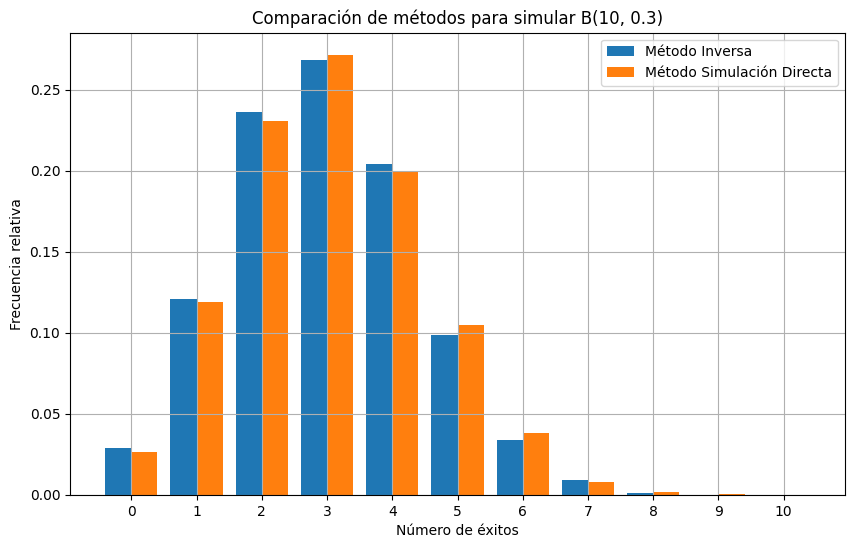

In [ ]:
import random
import time
import matplotlib.pyplot as plt
from collections import Counter

# i
def binomial_inversa(n, p):
    c = p / (1 - p)
    prob = (1 - p) ** n
    F = prob
    i = 0
    U = random.random()
    while U >= F:
        prob *= c * (n - i) / (i + 1)
        F += prob
        i += 1
    return i

# ii
def binomial_sim(n, p):
    i = 0
    for _ in range(n):
        u = random.random()
        if p >= u:
            i += 1
    return i

n = 10
p = 0.3
simulaciones = 10000

start_inv = time.time()
results_inv = [binomial_inversa(n, p) for _ in range(simulaciones)]
end_inv = time.time()
print(f"Metodo binomial inversa tiempo: {end_inv-start_inv:.6f} segundos")

start_sim = time.time()
results_sim = [binomial_sim(n, p) for _ in range(simulaciones)]
end_sim = time.time()
print(f"Metodo binomial tiempo: {end_sim-start_sim:.6f} segundos")

freq_inv = Counter(results_inv)
freq_sim = Counter(results_sim)
x_vals = list(range(n+1))
approx_inv = [freq_inv.get(i, 0) / simulaciones for i in x_vals]
approx_sim = [freq_sim.get(i, 0) / simulaciones for i in x_vals]
most_common_inv = freq_inv.most_common(1)[0]
most_common_sim = freq_sim.most_common(1)[0]

print(f"Binomial inversa - Valor más común: {most_common_inv[0]} (ocurrencias: {most_common_inv[1]})")
print(f"Binomial simulada - Valor más común: {most_common_sim[0]} (ocurrencias: {most_common_sim[1]})")
print(f"Proporción de 0 en Binomial Inversa: {freq_inv[0]/simulaciones:.4f}")
print(f"Proporción de 10 en Binomial Inversa: {freq_inv[10]/simulaciones:.4f}")
print(f"Proporción de 0 en Binomial Simulada: {freq_sim[0]/simulaciones:.4f}")
print(f"Proporción de 10 en Binomial Simulada: {freq_sim[10]/simulaciones:.4f}")

plt.figure(figsize=(10, 6))
plt.bar([x - 0.2 for x in x_vals], approx_inv, width=0.4, label='Método Inversa')
plt.bar([x + 0.2 for x in x_vals], approx_sim, width=0.4, label='Método Simulación Directa')
plt.xlabel('Número de éxitos')
plt.ylabel('Frecuencia relativa')
plt.title('Comparación de métodos para simular B(10, 0.3)')
plt.legend()
plt.grid(True)
plt.xticks(x_vals)
plt.show()

# Ejercicio 6

Método de la transformada inversa tiempo: 0.014780 segundos
Método de rechazo tiempo: 0.032245 segundos


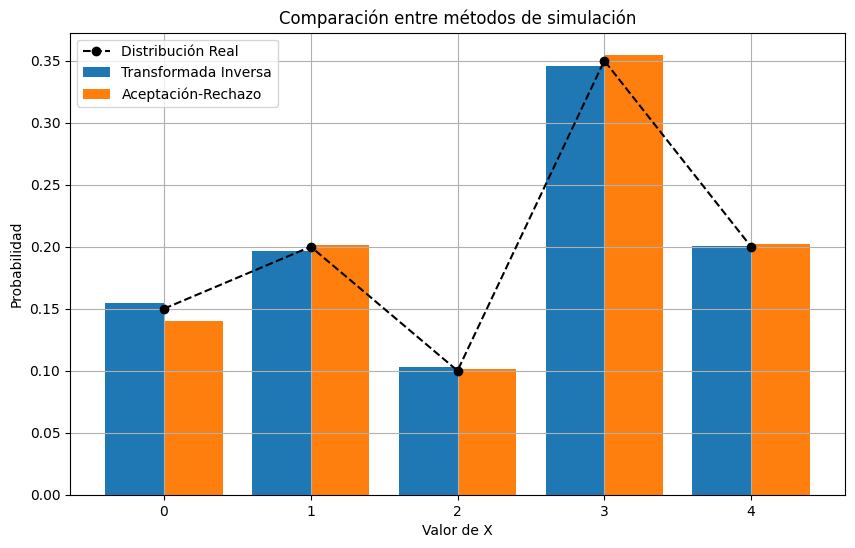

In [ ]:
import random
import time
import matplotlib.pyplot as plt
from collections import Counter

p_real = {0: 0.15, 1: 0.20, 2: 0.10, 3: 0.35, 4: 0.20}

def tim_discretaX(p):
    diccionario_ordenado = sorted(p.items(), key=lambda item: item[1], reverse=True)
    U = random.random()
    F = 0
    i = 0
    while U >= F:
        F += diccionario_ordenado[i][1]
        i += 1
    return diccionario_ordenado[i-1][0]

def binom_real(n, p):
    py = []
    prob = (1 - p) ** n
    py.append(prob)
    for j in range(n):
        prob *= (n - j) / (j + 1)
        prob *= p / (1 - p)
        py.append(prob)
    return py

def ti_bin(n, p):
    c = p / (1 - p)
    prob = (1 - p) ** n
    F = prob
    i = 0
    U = random.random()
    while U >= F:
        prob *= c * (n - i) / (i + 1)
        F += prob
        i += 1
    return i

def metodo_rechazo(c, binom_p, p_real):
    while True:
        Y = ti_bin(4, 0.45)
        U = random.random()
        if U < p_real[Y] / (c * binom_p[Y]):
            return Y  # Aceptamos Y como X

start = time.perf_counter()
result_transformada = [tim_discretaX(p_real) for _ in range(10000)]
end = time.perf_counter()
print(f"Método de la transformada inversa tiempo: {end - start:.6f} segundos")

binom_p = binom_real(4, 0.45)
c = max([p_real[i] / binom_p[i] for i in range(5)])

start = time.perf_counter()
result_rechazo = [metodo_rechazo(c, binom_p, p_real) for _ in range(10000)]
end = time.perf_counter()
print(f"Método de rechazo tiempo: {end - start:.6f} segundos")


freq_transf = Counter(result_transformada)
freq_rechazo = Counter(result_rechazo)
x_vals = list(range(5))
total = 10000
approx_transf = [freq_transf.get(i, 0)/total for i in x_vals]
approx_rechazo = [freq_rechazo.get(i, 0)/total for i in x_vals]

plt.figure(figsize=(10,6))
plt.bar([x-0.2 for x in x_vals], approx_transf, width=0.4, label='Transformada Inversa')
plt.bar([x+0.2 for x in x_vals], approx_rechazo, width=0.4, label='Aceptación-Rechazo')
plt.plot(x_vals, [p_real[i] for i in x_vals], 'ko--', label='Distribución Real')  # Línea de la distribución real
plt.xlabel('Valor de X')
plt.ylabel('Probabilidad')
plt.title('Comparación entre métodos de simulación')
plt.legend()
plt.grid(True)
plt.xticks(x_vals)
plt.show()

# Ejercicio 7

In [ ]:
import random
import math

def transformada_inversa_poisson(lambd):
    U = random.random()
    i = 0
    p = math.exp(-lambd)
    F = p
    while U >= F:
        i += 1
        p *= lambd / i
        F += p
    return i

def transformada_inversa_mejor_poisson(lamda):
  p = math.exp(-lamda); F = p
  for j in range(1, int(lamda) + 1):
    p *= lamda / j
    F += p
  U = random.random()
  if U >= F:
    j = int(lamda) + 1
    while U >= F:
      p *= lamda / j; F += p
      j += 1
    return j - 1
  else:
    j = int(lamda)
    while U < F:
      F -= p; p *= j/lamda
      j -= 1
    return j+1

def acumulada_poisson(lamda, x):
    resultado = 0
    for i in range(x + 1):
        resultado += math.exp(-lamda) * (lamda ** i) / math.factorial(i)
    return resultado

n = 1000
lambd = 10
count_normal = 0
count_mejorada = 0

for _ in range(n):
    if transformada_inversa_poisson(lambd) > 2:
        count_normal += 1
    if transformada_inversa_mejor_poisson(lambd) > 2:
        count_mejorada += 1

prob_normal = count_normal / n
prob_mejorada = count_mejorada / n
valor_real = 1 - acumulada_poisson(lambd, 2)

print("Valor real de la probabilidad P(Y > 2):",valor_real)
print(f"Estimación P(Y > 2) con transformada inversa común: {prob_normal:.4f}")
print(f"Estimación P(Y > 2) con transformada inversa mejorada: {prob_mejorada:.4f}")


Valor real de la probabilidad P(Y > 2): 0.9972306042844884
Estimación P(Y > 2) con transformada inversa común: 0.9960
Estimación P(Y > 2) con transformada inversa mejorada: 0.9950


# Ejercicio 8

Originalmente la distribución dada es:
$$
P(X = i) = \frac{\frac{\lambda^i}{i!} e^{-\lambda}}{\sum_{j=0}^{k} \frac{\lambda^j}{j!} e^{-\lambda}}
$$

**Ex.1**
$$
P(X = i) = \frac{\frac{\lambda^{(i-1)}}{(i-1)!}}{\sum_{j=0}^{k} \frac{\lambda^j}{j!}}*{\frac{\lambda^{(i-1)}}{(i-1)!}}
$$

**Ex.2**

La idea principal es acumular de la mejor forma probabilidades, enfocándose alrededor del valor más probable de la Poisson.
En una Poisson(𝜆) el "pico" de la distribución está cerca de 𝑖=𝜆

Ejemplos:

- Si 𝜆 = 0.7 -> 0 y 1 valores más probables.
- Si 𝜆 = 5 -> los valores 4, 5, 6 son los más importantes.

Por lo que en vez de construir 𝐹 empezando desde 0 y sumando hasta encontrar el 𝑢 ,primero construimos hasta alrededor de 𝜆, para estar más cerca del valor que vamos a necesitar, ahorrando cálculos.

Notar que el bucle va hasta int(𝜆) - 1

**Ex.3**

Ya habíamos construido una suma parcial de probabilidades 𝐹 hasta alrededor de
𝜆.
Ahora tenemos un uniforme 𝑢 ∈ (0,1). Y queremos encontrar el valor 𝑋 tal que el acumulado 𝐹 alcance o pase el 𝑢. Hay dos caminos:

1. Caso if u < F: La uniforme cayó en un rango más chico de lo que acumulamos.
Entonces tenemos que ir para atrás:
  
  a. F -= p: Retrocedemos en la acumulada.

  b. p *= j / lamb: Actualizamos la probabilidad 𝑃(𝑗−1) a partir de 𝑃(𝑗).

  c. Cuando el while termina, significa que encontramos el índice correcto, pero como hicimos un -1 de más.

2. Caso if u > F: La uniforme cayó en un rango más grande de lo que acumulamos. Entonces tenemos que ir para adelante:

  a. p *= lamb / j : Actualizamos la probabilidad 𝑃(𝑗) a partir de 𝑃(𝑗-1).
  
  b. F += p: Sumamos esa probabilidad a la acumulada.

  


**Ex.4**

Consideramos:
$$
X \sim PoissonTruncada(λ,k)
$$
$$
Y \sim Poisson(λ)
$$
Por lo que podemos deducir que, la "función objetivo" sería:
$$
p(t) = P(X=t) = \frac{\frac{\lambda^t}{t!} e^{-\lambda}}{\sum_{j=0}^{k} \frac{\lambda^j}{j!} e^{-\lambda}}
$$
Y la función propuesta sería:
$$
q(t) = P(Y=t) = \frac{\lambda^t}{t!} e^{-\lambda}
$$

Entonces queremos encontrar una constante **c** que nos permita cumplir con que
$$ p(t) \leq c*q(t) ∀t $$
En este caso se puede deducir fácilmente que
$$ c = \frac{1}{\sum_{j=0}^{k} \frac{\lambda^j}{j!} e^{-\lambda}}
$$

In [ ]:
from random import random
import math
import time

def poisson(lamda):
    # Poisson sin optimizar del teorico.
    U = random()
    i = 0
    p = math.exp(-lamda)
    F = p

    while U >= F:
        i += 1
        p *= lamda / i
        F = F + p

    return i

def PY(lamb, i):
    # P(Y=i) -> Función de masa de Poisson pmf
    p = math.exp(-1*lamb)
    for j in range(1, i + 1):
        p *= lamb / j
    return p

def sumatoria(lamb, k):
    # Constante que va en el denominador
    p = math.exp(-1*lamb)
    S = p
    for j in range(1, k + 1):
        p *= lamb / j
        S = S + p
    return S

def PX(lamb, k, i):
    # P(X=i) (i=1, ... , k)
    return PY(lamb, i) / sumatoria(lamb, k)

def poisson_truncada(lamb, k):
    # Transformada Inversa
    u = random()
    i = 0
    S = sumatoria(lamb, k)
    p = math.exp(-1 * lamb) / S
    F = p
    while u >= F:
        i += 1
        p *= lamb / i #"Moverse a la siguiente probabilidad" (Ex.1)
        F = F + p
    return i

def poisson_truncada_mej(lamb, k):
    # Transformada Inversa Mejorada
    S = sumatoria(lamb, k)
    p = math.exp(-1 * lamb) / S
    F = p
    for j in range(1,int(lamb)): # Ex.2
        p *= lamb / j
        F += p
    # Ex.3
    j = int(lamb)
    u = random()
    if u < F:
        while u < F:
            F -= p
            p *= j / lamb
            j -= 1
        return j + 1
    else:
        while u >= F:
            j += 1
            p *= lamb / j
            F += p
        return j

def est_P(X, lamb, k, i, n_sim=100): # P(X>i)
    # Simula muchas veces la variable 𝑋 usando la función generadora 𝑋().
    # Estima la probabilidad de que 𝑋>𝑖
    c = 0
    for _ in range(n_sim):
        r = X(lamb, k)
        if r > i:
            c += 1
    return c / n_sim

# Ex.4
def poisson_ayr(lamb, k):
    y = poisson(lamb)
    u = random()
    S = sumatoria(lamb, k)
    c = 1 / S
    qy = PY(lamb, y) #Prob acumulada hasta y
    while u >= PX(lamb, k, y) / (c * qy):
        y = poisson(lamb)
        qy = PY(lamb, y)
        u = random()
    return y

def poisson_ayr_mej(lamb, k):
    while True:
        y = poisson(lamb)
        if y <= k:
            return y

print("Estimación de P(X>2) con 1000 simulaciones")
print(f"Inversa: {est_P(poisson_truncada, 0.7, 10, 2, n_sim=1000)}")
print(f"Inversa MEJORADA: {est_P(poisson_truncada_mej, 0.7, 10, 2, n_sim=1000)}" )
print("----------------------------------------------------------------------------------------")
print(f"Estimación usando Aceptación y Rechazo: {est_P(poisson_ayr, 0.7, 10, 2, n_sim=1000)}")
print(f"Método Mejorado: {est_P(poisson_ayr, 0.7, 10, 2, n_sim=1000)}")
print("----------------------------------------------------------------------------------------")
print(f"Valor exacto P(X > 2) = {1 - (PX(0.7, k=10, i=0) + PX(0.7, k=10, i=1) + PX(0.7, k=10, i=2))}")

# Si quiero comparar el tiempo de corrida de las distintas funciones de Transf Inversa
print("----------------------------------------------------------------------------------------")
start = time.perf_counter()
est_P(poisson_truncada, 0.7, 10, 2, n_sim=10000)
end = time.perf_counter()
print(f"Tiempo de corrida comun: {end - start:.5f}")

start = time.perf_counter()
est_P(poisson_truncada_mej, 0.7, 10, 2, n_sim=10000)
end = time.perf_counter()
print(f"Tiempo de corrida mejorada: {end - start:.5f}")

start = time.perf_counter()
est_P(poisson_ayr, 0.7, 10, 2, n_sim=10000)
end = time.perf_counter()
print(f"Tiempo de corrida AyR: {end - start:.5f}")

start = time.perf_counter()
est_P(poisson_ayr_mej, 0.7, 10, 2, n_sim=10000)
end = time.perf_counter()
print(f"Tiempo de corrida AyR mejorada: {end - start:.5f}")


Estimación de P(X>2) con 1000 simulaciones
Inversa: 0.04
Inversa MEJORADA: 0.032
----------------------------------------------------------------------------------------
Estimación usando Aceptación y Rechazo: 0.029
Método Mejorado: 0.03
----------------------------------------------------------------------------------------
Valor exacto P(X > 2) = 0.03414158387347266
----------------------------------------------------------------------------------------
Tiempo de corrida comun: 0.02796
Tiempo de corrida mejorada: 0.03534
Tiempo de corrida AyR: 0.06629
Tiempo de corrida AyR mejorada: 0.00703


#Ejercicio 9

**Ex 1**
Notar que:
$$
p(n)=P(X=n)=p(1-p)^{n-1}\\
p(n+1)=P(X=n+1)=p(1-p)^{n}\\
Luego:\\
p(1-p)^{n}=p(1-p)(1-p)^{n-1}=(1-p)P(X=n)\\
Entonces:\\
P(X=n+1)=(1-p)P(X=n)
$$

In [ ]:
import math
import random
import time

def geom_ti_recursiva(p): #Ex.1
  prob = p
  q = 1-p
  U = random()
  F = prob
  i = 0
  while U >= F:
    i += 1
    prob *= q
    F += prob
  return i + 1

def bernoulli(p):
    return 1 if random.random() < p else 0

def geom_simulacion_directa(p):
  # Notemos que X ∼ Geom(p) es la variable que mide el numero de ensayos independientes de
  # una variable Bernoulli B(p) hasta obtener un exito
    count = 1
    while bernoulli(p) == 0:
        count += 1
    return count

def experimentar(p, n_simulaciones):
    start_inv = time.time()
    resultados_inversa = [geom_ti_recursiva(p) for _ in range(n_simulaciones)]
    tiempo_inv = time.time() - start_inv

    start_dir = time.time()
    resultados_directa = [geom_simulacion_directa(p) for _ in range(n_simulaciones)]
    tiempo_dir = time.time() - start_dir

    promedio_inv = sum(resultados_inversa) / n_simulaciones
    promedio_dir = sum(resultados_directa) / n_simulaciones

    return promedio_inv, promedio_dir, tiempo_inv, tiempo_dir

n_simulaciones = 10000

for p in [0.8, 0.2]:
    print(f"\n----- Para p = {p} -----")
    esperado = 1/p
    promedio_inv, promedio_dir, tiempo_inv, tiempo_dir = experimentar(p, n_simulaciones)

    print(f"Valor esperado: {esperado:.4f}")
    print(f"Promedio (Transformada Inversa): {promedio_inv:.4f} (tiempo: {tiempo_inv:.4f} s)")
    print(f"Promedio (Simulación Directa): {promedio_dir:.4f} (tiempo: {tiempo_dir:.4f} s)")



----- Para p = 0.8 -----
Valor esperado: 1.2500
Promedio (Transformada Inversa): 1.2437 (tiempo: 0.0068 s)
Promedio (Simulación Directa): 1.2536 (tiempo: 0.0018 s)

----- Para p = 0.2 -----
Valor esperado: 5.0000
Promedio (Transformada Inversa): 4.8934 (tiempo: 0.0081 s)
Promedio (Simulación Directa): 5.0990 (tiempo: 0.0056 s)


#Ejercicio 10

$$
P(X=j) = ({\frac{1}{2}})^{j+1}+\frac{(\frac{1}{2})*2^{j-1}}{3^j}
, j=1,2,....
$$
Resolveremos el problema por medio del método de la composición:
$$
P(X=j) = ({\frac{1}{2}})^{j+1}+\frac{(\frac{1}{2})*2^{j-1}}{3^j} \\
= {\frac{1}{2}}*({\frac{1}{2}})^{j}+{\frac{1}{2}}*\frac{2^{j-1}}{3^{j-1}}*{\frac{1}{3}}\\
={\frac{1}{2}}[{\frac{1}{2}}*({\frac{1}{2}})^{j-1}+(\frac{2}{3})^{j-1}*{\frac{1}{3}}] \\
Ocurre \ que \ {\frac{1}{2}}*({\frac{1}{2}})^{j-1} ∼ Geo({\frac{1}{2}}) \ le \ llamaremos \ X \ y \ (\frac{2}{3})^{j-1}*{\frac{1}{3}} ∼ Geo(\frac{1}{3}) \ le \ llamaremos \ Y\\
= {\frac{1}{2}}[P(X=j)+P(Y=j)] \\
= {\frac{1}{2}}P(X=j)+{\frac{1}{2}}P(Y=j) \\
Entonces \ α = {\frac{1}{2}} \ 1-α = {\frac{1}{2}} \\
$$

In [ ]:
import random
import math

# Probabilidad P(X=j)
def probabilidad(j):
    return (1/2)**(j+1) + ( (1/2)*(2**(j-1)) / (3**j) )

def geo (p):
  U =1-random.random()
  return int(math.log(U)/math.log(1-p))+1

def simular_X_transformada():
  U = random.random()
  if U < 1/2:
    X1 = geo(1/2)
    return X1
  else:
    X2 = geo(1/3)
    return X2

n = 1000
esperanza_teorica = sum(j * probabilidad(j) for j in range(1, 100))
print(f"Valor teorico de la esperanza E(X): {esperanza_teorica:.4f}")

muestras = [simular_X_transformada() for _ in range(n)]
promedio_muestral = sum(muestras) / n
print(f"Estimación de E(X) con {n} repeticiones: {promedio_muestral:.4f}")

Valor teorico de la esperanza E(X): 2.5000
Estimación de E(X) con 1000 repeticiones: 2.4930


#Ejercicio 11

a) Mostrar que $$ p_1 = λ_1 $$ y $$ p_n = (1-λ_1)(1-λ_2)...(1-λ_{n-1})λ_n$$

Veamos el caso base
$$
λ_1 = P(X=1|X>0)={\frac{P(X=1,X>0)}{P(X>0)}}={\frac{P(X=1)}{1}}=p_1
$$
Por lo que
$$λ_2 = {\frac{p_2}{1-p_1}}$$
Entonces:
$$λ_2(1-p_1) = p_2$$
$$λ_2(1-λ_1) = p_2$$

Sean
$$s(k)=\sum_{j=1}^kp_j$$ y

$$m(k)=\prod_{j=1}^k(1-\lambda_j)$$

Vamos a probar por HI... osea queremos ver $p_{k+1}= \lambda_{k+1}m(k)$ suponiendo que vale para $k$. Ahora tenemos por definicion:

\begin{align*}
\\
\lambda_k &= \frac{p_k}{1-s(k-1)}\\
1-s(k-1) &= \frac{p_k}{\lambda_k} \\
1-\frac{p_k}{\lambda_k} &=s(k-1)  \\\\
&\text{(Por HI)}\\
1-m(k-1) &=s(k-1) \quad (❤️)
\end{align*}



Por lo tanto:

\begin{align*}
\\
p_{k+1} &= \lambda_{k+1}(1-s(k)) \\
&= \lambda_{k+1}(1-(s(k-1)+p_k)) \\\\
&\text{Por }(❤️)\\
&= \lambda_{k+1}(1-(1-m(k-1)+p_k)) \\
&= \lambda_{k+1}(m(k-1)-p_k)\\\\
&\text{(Por HI)}\\
&= \lambda_{k+1}(m(k-1)-m(k-1)\lambda_k)\\
&= \lambda_{k+1}m(k-1)(1-\lambda_k)\\
&= \lambda_{k+1}m(k)  
\end{align*}


In [ ]:
def x_tasa_discreta(p,**kwargs):
    """
    Metodo de la tasa discreta
    """

    k = 1
    sum = 1
    l = 1
    while True:
        u = random.random()
        if k == 1:
            pass
        else:
          sum -= p(x=k-1,**kwargs)
          # sum -= l*sum
        l = p(x=k,**kwargs)/sum
        if u < l:
            return k
        k += 1

b) Supongamos que $X$ genera el valor $n$, es decir, sucedio que para cada $i< n$ se genero un valor $u_i$ aleatorio en $\,\mathcal U[0,1]$ que cumplieron $u_i\geq\lambda_i$, pero el $n$-esimo generado cumplió $u_n<\lambda_n$ osea:


\begin{align*}
P(X \text{ generar } n)&=\\
P(u_1\geq\lambda_1,\cdots,u_{n-1}\geq\lambda_{n-1},u_n<\lambda_n)&=\prod_{i=1}^{n-1}P(u_i>\lambda_i)\cdot P(u_n<\lambda_n)\\
&=\prod_{i=1}^{n-1}(1-\lambda_i)\cdot \lambda_n\\
&=p_n
\end{align*}

c)La acumulada es $P(X\leq n)=1-(1-p)^n$, por lo tanto
\begin{align*}
\\
P(X> n-1)=1-P(X\leq n-1)=1-(1-(1-p)^{n-1})=(1-p)^{n-1}
\end{align*}
 entonces:

$$\lambda_n=\frac{p(1-p)^{n-1}}{(1-p)^{n-1}}=p$$

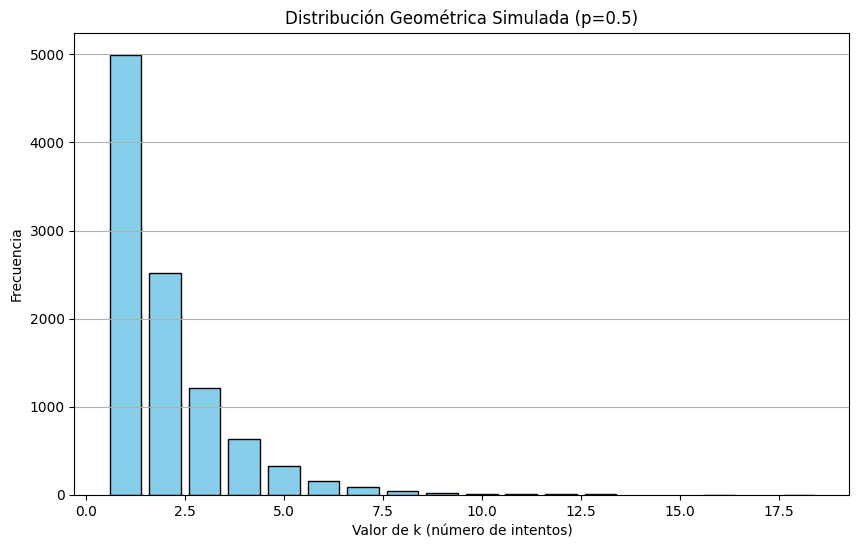

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def geom_tasa_discreta(pr):
    k = 1
    while True:
        u = random.random()
        if u < pr:
            return k
        k += 1

pr = 0.5
n_simulaciones = 10000
resultados = [geom_tasa_discreta(pr) for _ in range(n_simulaciones)]

frecuencias = Counter(resultados)
valores = sorted(frecuencias.keys())
conteos = [frecuencias[val] for val in valores]

plt.figure(figsize=(10,6))
plt.bar(valores, conteos, width=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Valor de k (número de intentos)')
plt.ylabel('Frecuencia')
plt.title(f'Distribución Geométrica Simulada (p={pr})')
plt.grid(axis='y')
plt.show()

#Ejercicio 12

Notar que:
$$
X \sim Geom(p_1) \\
Y \sim Geom(p_2)
$$
Por lo que min(X,Y) es una nueva variable.Pero, ¿qué distribución tiene?:
Recordando que X,Y son geométricas independientes...
$$
P(min(X,Y)=j)=P(X=j,Y>j)+P(X>j,Y=j)+P(X=j,Y=j)\\
=P(X=j)*P(Y>j)+P(X>j)*P(Y=j)+P(X=j)*P(Y=j)\\
=p_1(1-p_1)^{j-1}*(1-p_2)^{j} + p_2(1-p_2)^{j-1}*(1-p_1)^{j} + p_1(1-p_1)^{j-1} * p_2(1-p_2)^{j-1} \\
= (1-p_1)^{j-1}*(1-p_2)^{j-1}[p_1(1-p_2)+p_2(1-p_1)+p_1p_2] \\
Si \ desarollamos \ : p_1(1-p_2)+p_2(1-p_1)+p_1p_2 \\
Obtenemos:\ p_1+p_2-p_1p_2 \ (llamaremos \ esto \ q \ por \ comodidad)\\
Luego \ desarrollamos: \ (1-p_1)^{j-1}*(1-p_2)^{j-1} = [(1-p_1)*(1-p_2)]^{j-1} \\
= [1-p_2-p_1+p_1p_2]^{j-1} \\
Notar que (-p_2-p_1+p_1p_2) = -q\\
Por\ lo\ que\ nos\ queda\ que:\\
= (1-p_1)^{j-1}*(1-p_2)^{j-1}[p_1(1-p_2)+p_2(1-p_1)+p_1p_2] \\
= [1-q]^{j-1}*q \ donde \ q = p_1+p_2-p_1p_2\\
Obteniendo \ entonces \ que \ P(min(X,Y)=j)=[1-q]^{j-1}*q \, entonces \ min(X,Y) ∼ Geo(p_1+p_2-p_1p_2)
$$


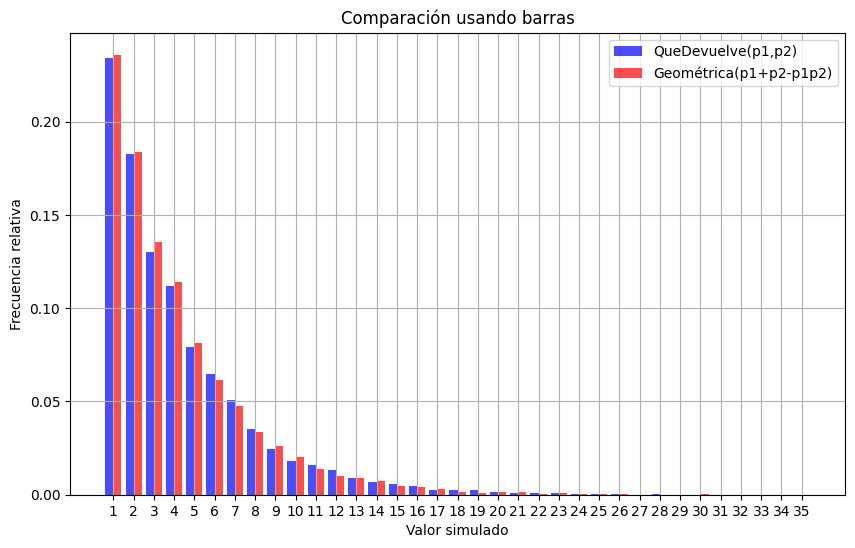

In [ ]:
import math
from random import random
import numpy as np
import matplotlib.pyplot as plt

def geometrica(p):
  U=1-random()
  return int(math.log(1-U)/math.log(1-p))+1

def QueDevuelve(p1,p2):
  X = int(math.log(1-random())/math.log(1-p1))+1
  Y = int(math.log(1-random())/math.log(1-p2))+1
  return min(X,Y)

N = 10000
p1, p2 = 0.05, 0.2
datos_que_devuelve = [QueDevuelve(p1, p2) for _ in range(N)]
parametro_para_geo = p1+p2-p1*p2
datos_simulacion = [geometrica(parametro_para_geo) for _ in range(N)]

valores = np.arange(1, max(max(datos_que_devuelve), max(datos_simulacion)) + 1)
frecuencias_que_devuelve = np.array([datos_que_devuelve.count(v) for v in valores]) / N
frecuencias_simulacion = np.array([datos_simulacion.count(v) for v in valores]) / N

plt.figure(figsize=(10,6))
plt.bar(valores - 0.2, frecuencias_que_devuelve, width=0.4, label="QueDevuelve(p1,p2)", color='blue', alpha=0.7)
plt.bar(valores + 0.2, frecuencias_simulacion, width=0.4, label="Geométrica(p1+p2-p1p2)", color='red', alpha=0.7)


plt.xlabel("Valor simulado")
plt.ylabel("Frecuencia relativa")
plt.title("Comparación usando barras")
plt.legend()
plt.grid(True)
plt.xticks(valores)
plt.show()

In [ ]:
import random

def generar_X():
  while True:
    U = random.random()
    Y = random.random()
    if U <= (30 * (Y**2 - 2 * Y**3 + Y**4)) / (15/8):
      return Y

n_sim= 10000
muestra = [generar_X() for _ in range(n_sim)]
espe = sum(muestra) / n_sim
print("El valor esperado de X es aproximadamente:", espe)

def codigoX(p):
  U = random.random()
  i = 10
  P_X_i = p
  F_X_i = P_X_i
  while U > F_X_i:
    i += 1
    P_X_i = (1 - p) * P_X_i
    F_X_i += P_X_i
  return i

def estimar_esperanza(p, n):
  muestra = [codigoX(p) for _ in range(n)]
  return sum(muestra) / n

p = 0.5
n_sim = 10000
esperanza = estimar_esperanza(p, n_sim)
print("La esperanza de X para p = 0.5 es aproximadamente:", esperanza)

El valor esperado de X es aproximadamente: 0.49686477967485954
La esperanza de X para p = 0.5 es aproximadamente: 10.997
